**Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.**

train classification models on the dataset and choosing the best model based on accuracy

**Brief description of the data set you chose and a summary of its attributes**

The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, 
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.It has a total of 768 rows and 9 columns

| S No. | Column | Description| Data Type | Category| Type
| --- | --- | --- | --- | --- | --- |
|1 | Pregnancies | Number of times pregnant | Int | Discrete | Variable |
|2 | Glucose | Plasma glucose concentration a 2 hours in an oral glucose tolerance test | Int | Discrete | Variable |
|3 | Blood pressure | Diastolic blood pressure (mm Hg) | Int | Discrete | Variable |
|4 |Skin thickness | Triceps skin fold thickness (mm) | Int | Discrete | Variable |
|5 | Insulin | 2-Hour serum insulin (mu U/ml) | Int | Discrete | Variable |
|6 | BMI | Body mass index (weight in kg/(height in m)^2) | Float | Continuous | Variable |
|7 | DiabetesPedigreeFunction | Diabetes pedigree function| Float | Continuous | Variable |
|8 | Age | Age (years) | Int | Discrete | Variable |
|9 | Outcome | Class variable (0 or 1)| Int | Discrete | Target |

**Plan for Data Exploration, Feature Engineering and Modelling**

The steps in solving the Regression Problem are as follows:
1. Packages to be installed
2. Load the libraries
3. Load the dataset
4. General information about the dataset
5. Exploratory Data Analysis (EDA)
6. Modeling
7. Recommendations

## Packages to be installed

1. tpot
2. auto-sklearn
3. scipy

In [ ]:
!conda install -c anaconda swig dask[distributed] --yes
!pip install pycaret[full]
!pip install deap update_checker tqdm stopit xgboost
!pip install tpot
!pip install auto-sklearn
!pip install 'ray[default]'
!pip install --upgrade --force-reinstall scikit-learn
!pip install scikit-optimize
!pip install scipy==1.7.0

## Load the libraries

1. numpy
2. pandas
3. matplotlib
4. seaborn
5. sklearn
6. autosklearn
7. tpot

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm_notebook
from sklearn.utils import all_estimators
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor, StackingClassifier, VotingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedShuffleSplit, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.utils import all_estimators
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import warnings
from scipy.linalg import LinAlgWarning
from sklearn.exceptions import ConvergenceWarning
import autosklearn.classification 
from tpot import TPOTClassifier
from pycaret.classification import *

## Load the dataset

location of dataset

In [3]:
dataset = '/kaggle/input/diabetes-dataset/diabetes.csv'

reading the dataset into dataframe

In [4]:
df = pd.read_csv(dataset)

## General information about the dataset

sampling the data

In [5]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


number of rows and coulmns in dataset

In [6]:
print(df.shape)

(768, 9)


dataset information

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


**Actions taken for data cleaning and feature engineering**

Capitalize column names

In [8]:
tqdm_notebook.pandas()
df.columns = df.columns.str.capitalize()

Classifying columns as Numerical or Categorical

In [9]:
num_cols = df.select_dtypes('number').columns.tolist()

Features Encoding

In [10]:
sc = MinMaxScaler()
df2 = df.iloc[:,:-1]
num_features = num_cols[:-1]
df2[num_features] = sc.fit_transform(df2[num_features])

 Split the data into test and train

In [11]:
features = df2.columns
target = df.columns[-1]
X = df2
Y = df[target]
sss = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=0)
train_indecies = list(sss.split(X,y=Y))
train_index, test_index = train_indecies[0][0], train_indecies[0][1]
X_train, X_test = X.loc[train_index], X.loc[test_index]
y_train, y_test = Y.loc[train_index], Y.loc[test_index]

## Exploratory Data Analysis (EDA)

Summary Statistics for Numerical columns

In [12]:
print(df.describe())

       Pregnancies     Glucose  Bloodpressure  Skinthickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              Bmi  Diabetespedigreefunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

Visual Exploration of Numerical Columns

Distribution of Age for patients

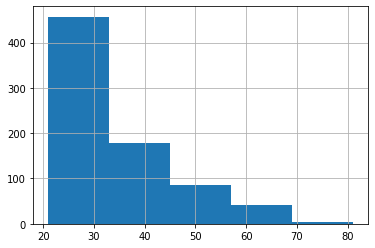

In [13]:
df['Age'].hist(bins=5);

Correlation between Age and BMI

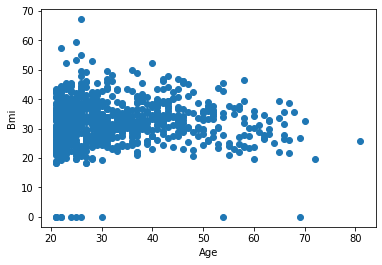

In [14]:
x = df['Age']
y = df['Bmi']
plt.scatter(x,y)
plt.xlabel('Age')
plt.ylabel('Bmi');

Visual Exploration of Categorical columns

Count No. of pregnancies

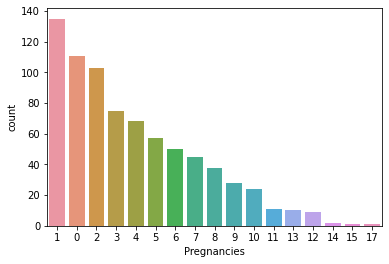

In [15]:
sns.countplot(data=df, x='Pregnancies',order=df['Pregnancies'].value_counts().index);

Distribution of Pregnancies for each BMI category

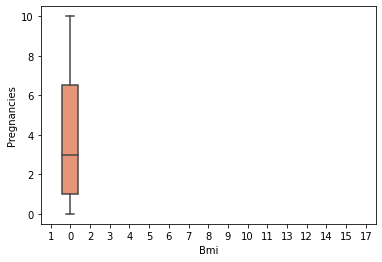

In [16]:
sns.boxplot(y=df['Pregnancies'], x=df['Bmi'],order=df['Pregnancies'].value_counts().index);

Pair plot of numerical features

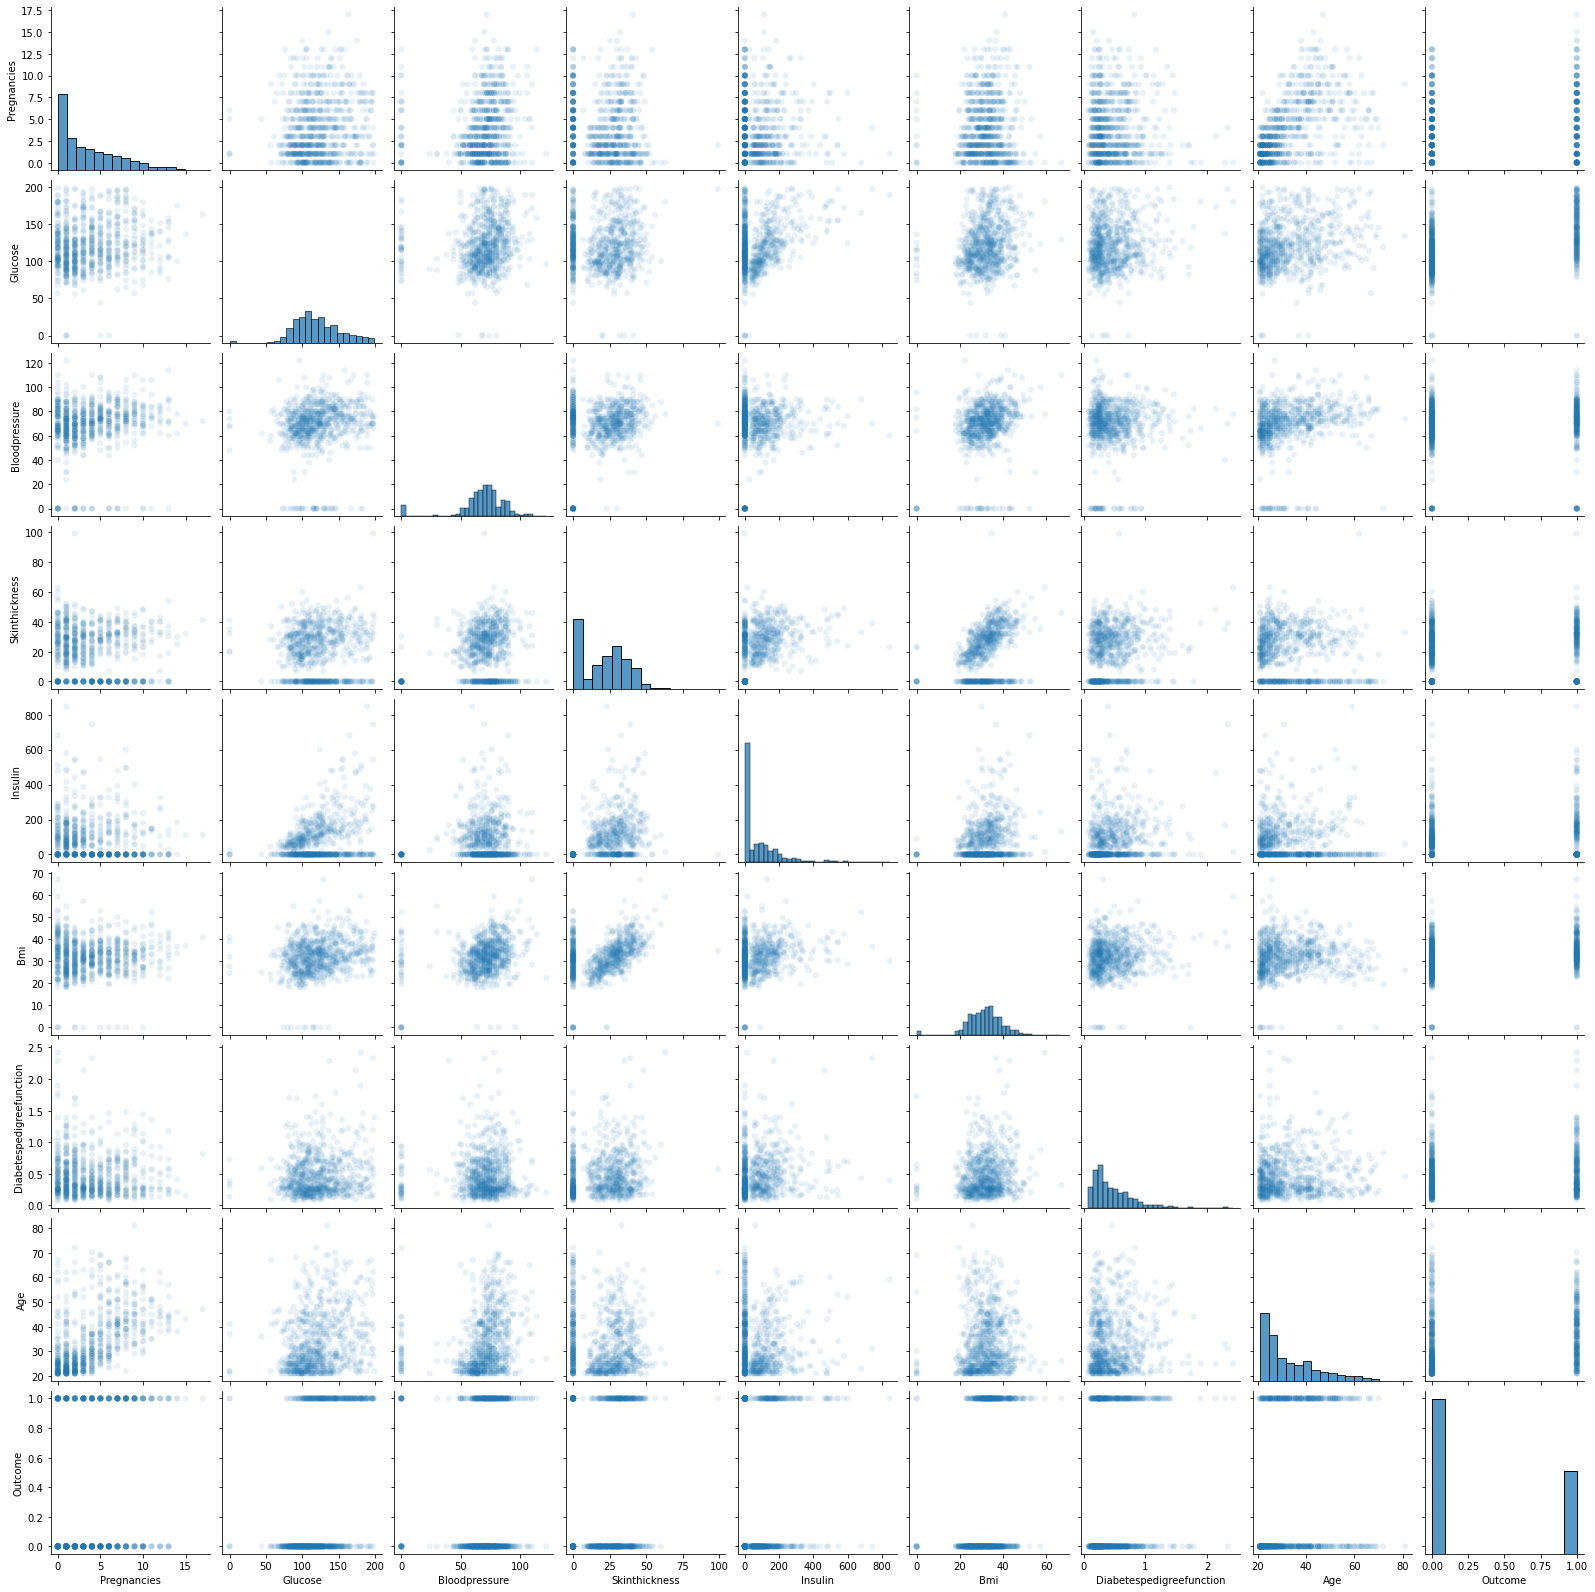

In [17]:
sns.pairplot(df[num_cols], plot_kws=dict(alpha=.1, edgecolor='none'));

heatmap of numerical features

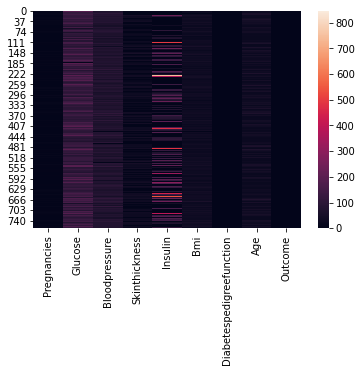

In [18]:
sns.heatmap(df[num_cols]);

correlation plot of numerical features

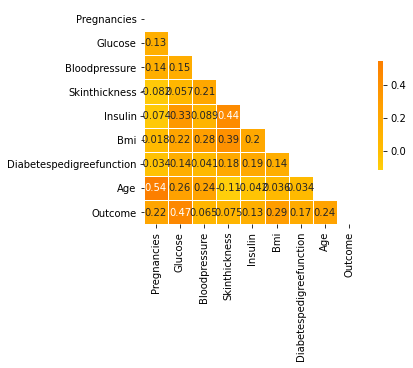

In [19]:
corr = df.corr()
mask = np.triu(corr)
sns.heatmap(corr, mask=mask, cmap='Wistia', center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5},  annot= True);

Feature Importance

                    Feature  Feature_importance %
1                   Glucose             29.080766
7                       Age             14.939669
5                       Bmi             13.555312
6  Diabetespedigreefunction             10.446590
0               Pregnancies              9.149903
2             Bloodpressure              8.863398
4                   Insulin              7.204944
3             Skinthickness              6.759418


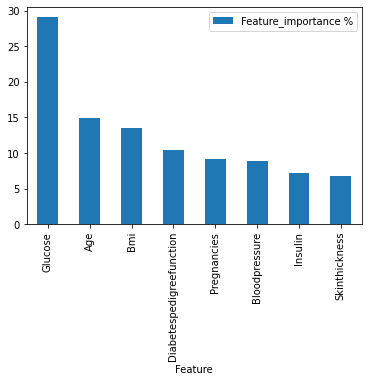

In [20]:
fe = ExtraTreesRegressor(n_estimators=10)
fe.fit(X, Y)
fedf = pd.DataFrame({'Feature':features,'Feature_importance %' : fe.feature_importances_ * 100})
fedf = fedf.sort_values(by=['Feature_importance %'], ascending=False)
print(fedf)
fedf.plot.bar(x='Feature',y='Feature_importance %');

## Modeling

**Summary of training at least three different classifier models, preferably of different nature in explainability and predictability. For example, you can start with a simple logistic regression as a baseline, adding other models or ensemble models. Preferably, all your models use the same training and test splits, or the same cross-validation method**

we will be using all the classifiers in the Sikit-Learn library and the comparing them according to accuracy

In [21]:
estimators = all_estimators(type_filter='classifier')
#sklearn.utils.all_estimators(type_filter='classifier', estimators = all_clfs)

all_clfs = []
for name, ClassifierClass in estimators:
    try:
        if name != 'CategoricalNB':
            clf = ClassifierClass()
            all_clfs.append((name,clf))
    except Exception as e:
        pass

voting_model = VotingClassifier(estimators=all_clfs, n_jobs=-1)

stack_model = StackingClassifier(estimators=all_clfs, final_estimator=LogisticRegression(), cv=3, n_jobs=-1)


In [22]:
#training the models
warnings.filterwarnings('ignore', category=LinAlgWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

results = []
names = []

for name, model in tqdm_notebook(all_clfs):
    if name == 'KNeighborsClassifier':
        weights = ['uniform', 'distance']
        algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
        leaf_size = list(range(1,50))
        n_neighbors = list(range(1,30))
        p=[1,2]
        metric = ['euclidean', 'manhattan', 'minkowski']
        hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p, algorithm=algorithm, weights=weights, metric=metric)
        rkfold = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=1)
        search_k = GridSearchCV(model, hyperparameters, scoring='accuracy', cv=rkfold, n_jobs=-1)
        search_k.fit(X_train, y_train)
        results.append(search_k.best_score_)
        names.append(name)
    else:
        rkfold = RepeatedStratifiedKFold(n_splits=2, n_repeats=99, random_state=1)
        scores = cross_val_score(model ,X_train, y_train,scoring='accuracy', cv=rkfold, n_jobs=-1)
        results.append(np.mean(scores))
        names.append(name)

  0%|          | 0/33 [00:00<?, ?it/s]

In [23]:
vcv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
v_scores = cross_val_score(voting_model, X_train, y_train, scoring='accuracy', cv=vcv, n_jobs=-1)
results.append(np.mean(v_scores))
names.append('Voting') 

scv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
s_scores = cross_val_score(stack_model, X_train, y_train, scoring='accuracy', cv=scv, n_jobs=-1)
results.append(np.mean(s_scores))
names.append('Stacking')

                        Classifier  Accuracy
33                          Voting  0.762198
19            LogisticRegressionCV  0.762050
16      LinearDiscriminantAnalysis  0.761721
17                       LinearSVC  0.760307
29                 RidgeClassifier  0.758991
30               RidgeClassifierCV  0.758958
3           CalibratedClassifierCV  0.758925
32                             SVC  0.753677
20                   MLPClassifier  0.747985
18              LogisticRegression  0.747985
10       GaussianProcessClassifier  0.747228
9                       GaussianNB  0.746192
13            KNeighborsClassifier  0.744300
28          RandomForestClassifier  0.743740
23                           NuSVC  0.741848
8             ExtraTreesClassifier  0.738295
34                        Stacking  0.736154
11      GradientBoostingClassifier  0.733722
0               AdaBoostClassifier  0.728128
22                 NearestCentroid  0.727947
1                BaggingClassifier  0.727125
26   Quadr

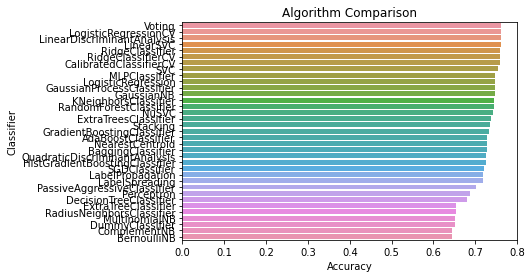

In [24]:
# Compare Algorithms
results_df = pd.DataFrame({'Classifier': names, 'Accuracy': results})
results_df = results_df.sort_values(by=['Accuracy'], ascending=False)
print(results_df)
sns.barplot(data=results_df, x='Accuracy', y='Classifier', orient = 'h');
plt.title('Algorithm Comparison');

**A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.**

Voting Classifier have the best score of all classification models for the training sets

so it will be chosen to make the prediction on the test set

In [26]:
voting_model.fit(X_train, y_train)
y_test_pred = voting_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Voting Classifier predictions accuracy: ",test_accuracy)

Voting Classifier predictions accuracy:  0.7922077922077922


**Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.**

* Glucose level in the blood is main factor in deciding the patient have diabities
* the Voting Classifier gave the best results even without GridSearch for the training set
* KNN have been tweaked to provide best results on training set (finding best algorithm, gridsearch of parameters, best k) but stil they produce less accurate results

## Recommendations

**Suggestions for next steps in analyzing this data, which may highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques to achieve a better explanation or a better prediction**

using automated machine learning yield better results than manual or gridseached models

for this dataset will use auto-sklearn and TPOT and compared thier results to results obtained before

In [27]:
automl = autosklearn.classification.AutoSklearnClassifier(
    n_jobs=4,
    tmp_folder='/tmp/classifier_example_tmp',
)
automl.fit(X_train, y_train, dataset_name='diabeties')
#print(automl.leaderboard())
#print(automl.show_models())
train_predictions = automl.predict(X_train)
asd = {'Classifier': 'AutoSklearn', 'Accuracy': accuracy_score(y_train, train_predictions)}
#print("Train Explained_Variance_Score:", as['Explained_Variance'])
#print("Test Explained_Variance_Score:", sklearn.metrics.explained_variance_score (y_test, test_predictions))

In [28]:
rkfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
tpot = TPOTClassifier(n_jobs=-1, generations=10, population_size=10, offspring_size=10, verbosity=0, cv=rkfold, scoring='accuracy',random_state=1)
tpot.fit(X_train, y_train)
tpd = {'Classifier': 'TPOT', 'Accuracy': tpot.score(X_train, y_train)}
#print('Best Pipeline Score= ',tp['Explained_Variance'])

                        Classifier  Accuracy
36                            TPOT  0.783388
35                     AutoSklearn  0.780130
0                           Voting  0.762198
1             LogisticRegressionCV  0.762050
2       LinearDiscriminantAnalysis  0.761721
3                        LinearSVC  0.760307
4                  RidgeClassifier  0.758991
5                RidgeClassifierCV  0.758958
6           CalibratedClassifierCV  0.758925
7                              SVC  0.753677
8                    MLPClassifier  0.747985
9               LogisticRegression  0.747985
10       GaussianProcessClassifier  0.747228
11                      GaussianNB  0.746192
12            KNeighborsClassifier  0.744300
13          RandomForestClassifier  0.743740
14                           NuSVC  0.741848
15            ExtraTreesClassifier  0.738295
16                        Stacking  0.736154
17      GradientBoostingClassifier  0.733722
18              AdaBoostClassifier  0.728128
19        

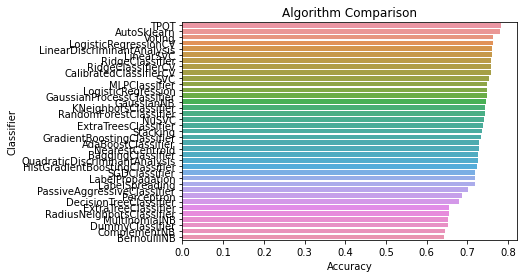

In [29]:
results_df = results_df.append(asd, ignore_index=True)
results_df = results_df.append(tpd, ignore_index=True)
results_df = results_df.sort_values(by=['Accuracy'], ascending=False)
print(results_df)
sns.barplot(data=results_df, x='Accuracy', y='Classifier', orient = 'h');
plt.title('Algorithm Comparison');

the default configuration for automated machine learning give better results than the model that manually selected and modified